In [1]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker) 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  #ax.set_xlabel('')
  #ax.set_ylabel('')
  ax.set_title(name)

In [13]:
# Markov marix (one-step transition matrix)
A = np.array([[0.95, 0.04, 0, 0],
              [0.05, 0.85, 0, 0],
              [0,    0.10, 1, 0],
              [0,    0.01, 0, 1]])

In [32]:
# Time period
T = 90
X = np.zeros((4, T))

# Initial state vector
X[:, 0] = np.array([0.9, 0.1, 0, 0])

for j in np.arange(1, T):
    X[:, j] = np.dot(A, X[:, j-1])

print(pd.DataFrame(X))

# Fraction of susceptible people over all time stamps
#print(X[0, :])  

# Fraction of infected people over all time stamps
#print(X[1, :])  

    0      1        2         3   ...        86        87        88        89
0  0.9  0.859  0.82125  0.786325  ...  0.045827  0.044319  0.042860  0.041449
1  0.1  0.130  0.15345  0.171495  ...  0.019570  0.018926  0.018303  0.017701
2  0.0  0.010  0.02300  0.038345  ...  0.849639  0.851596  0.853488  0.855319
3  0.0  0.001  0.00230  0.003835  ...  0.084964  0.085160  0.085349  0.085532

[4 rows x 90 columns]


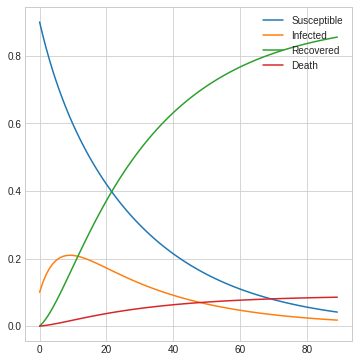

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
ax.plot(X[0, :])
ax.plot(X[1, :])
ax.plot(X[2, :])
ax.plot(X[3, :])
plt.legend(["Susceptible", "Infected", "Recovered", "Death"], loc ="upper right")